In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
csv_path = (r"C:\Users\NikitaRampurkarV-Sof\nikita_vsoft\tasks\Data Analysis\data preprocessing\diabetes.csv")  # Update this to your actual file path
df = pd.read_csv(csv_path)

In [3]:
%matplotlib inline

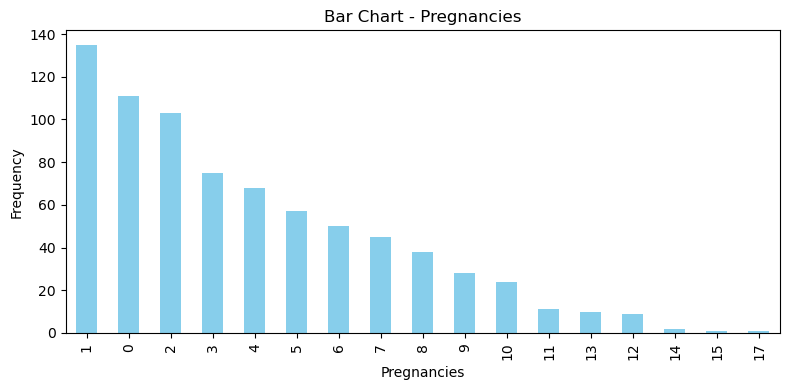

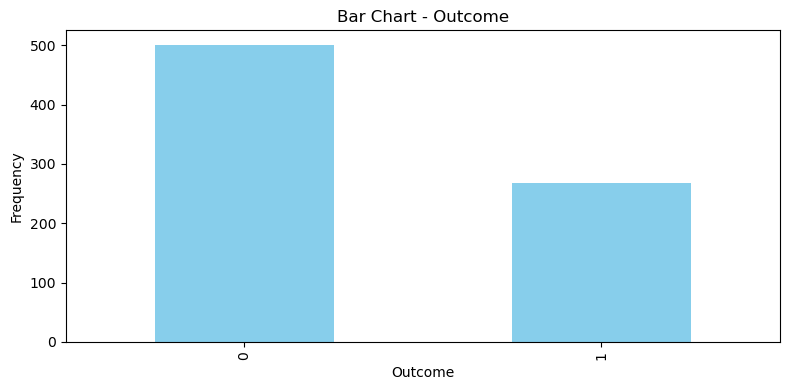

In [4]:
# --- 1. BAR CHART (for categorical columns or limited unique values) ---
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        plt.figure(figsize=(8, 4))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Bar Chart - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()  # <<< Show the plot in notebook


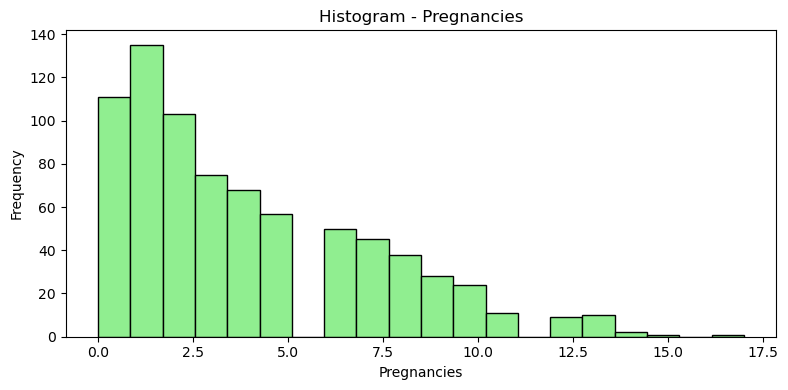

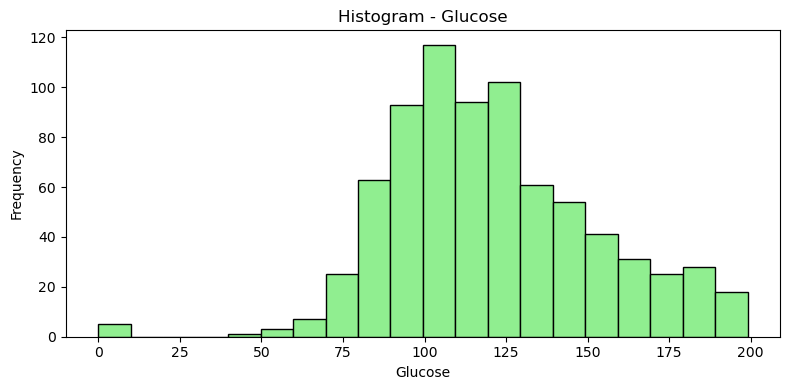

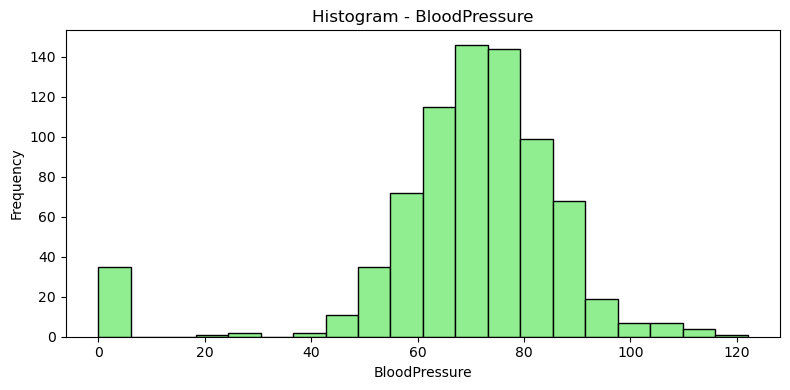

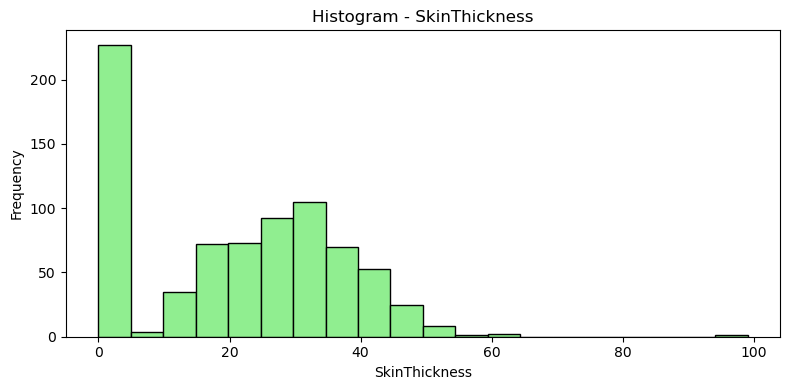

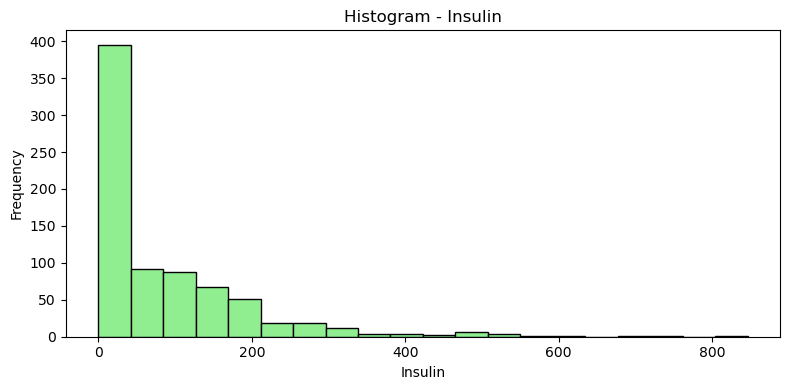

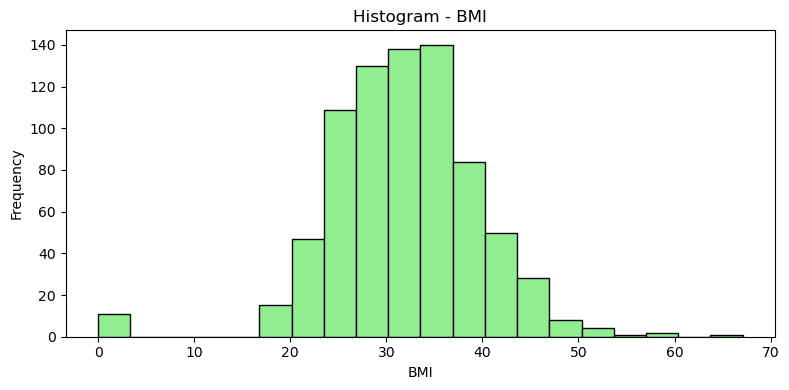

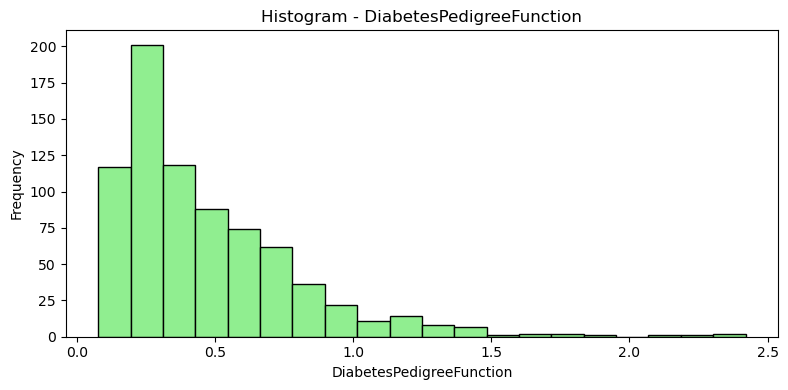

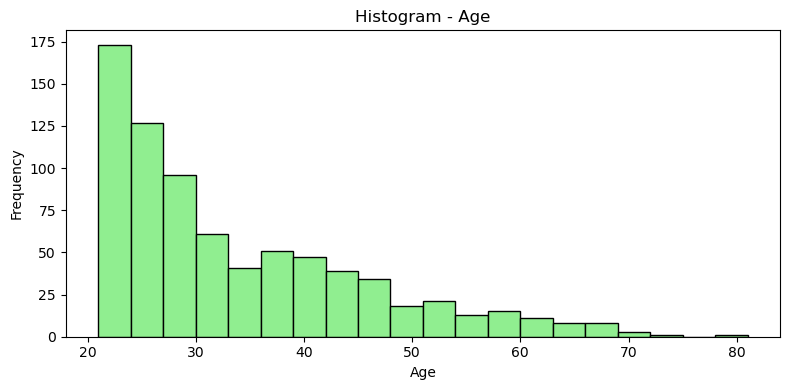

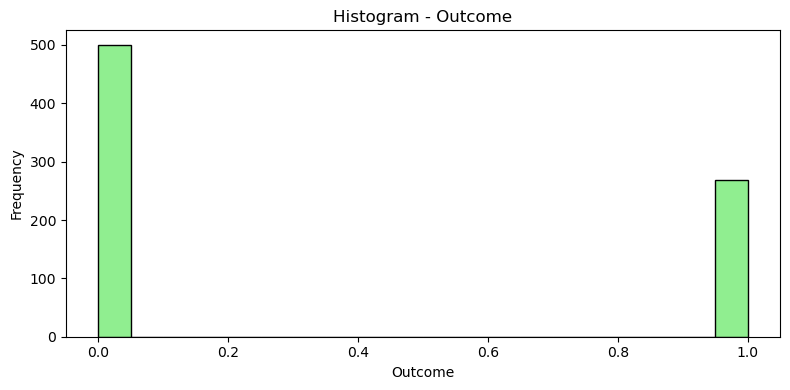

In [5]:
# --- 2. HISTOGRAM (for numeric columns) ---
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    df[col].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [6]:
# --- 3. DONUT CHART (for categorical columns) ---
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 10:
        donut_data = df[col].value_counts()
        fig = px.pie(values=donut_data.values, names=donut_data.index, hole=0.4,
                     title=f'Donut Chart - {col}')
        fig.show()

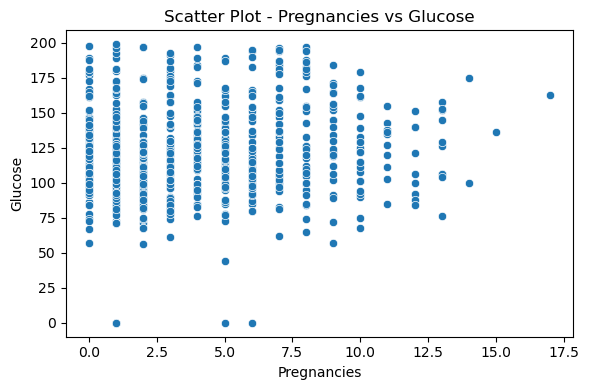

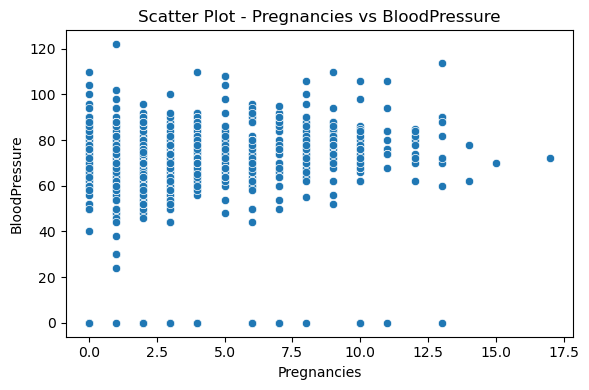

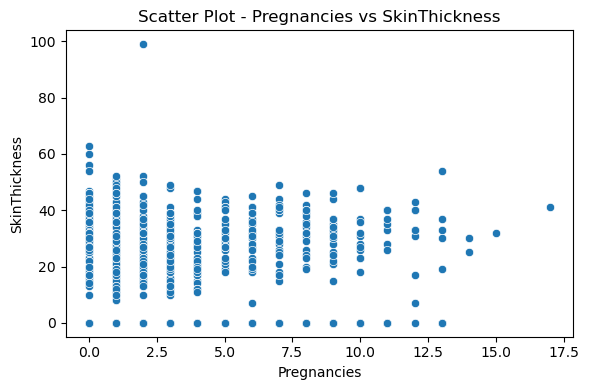

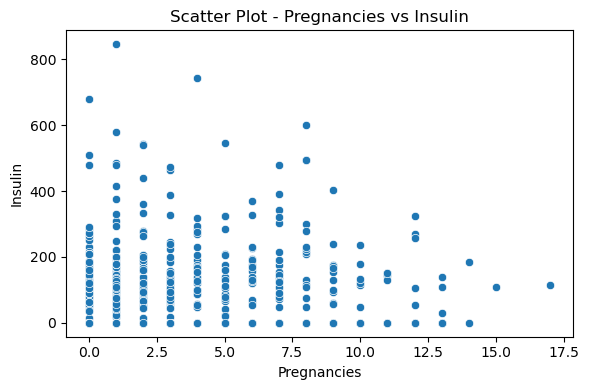

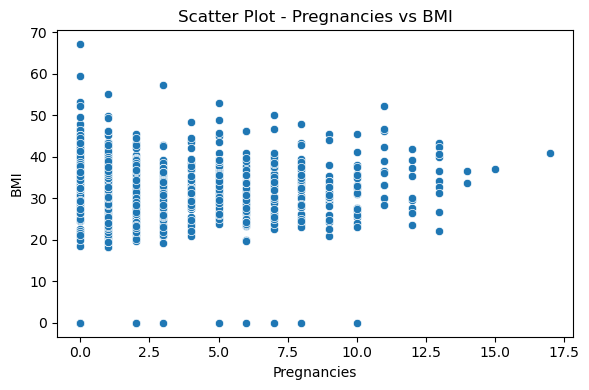

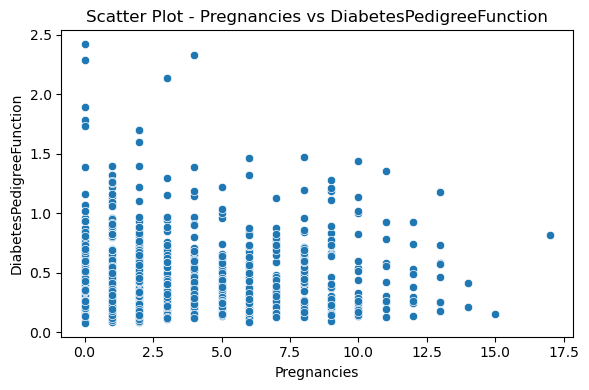

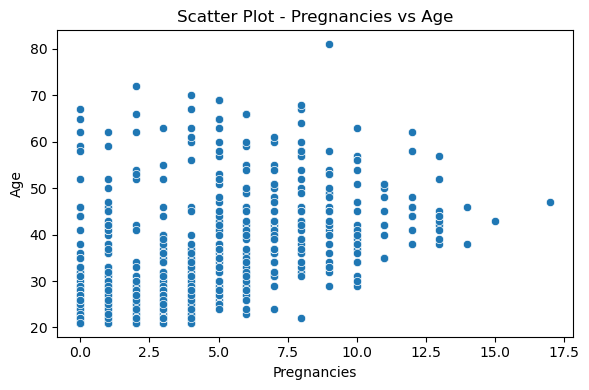

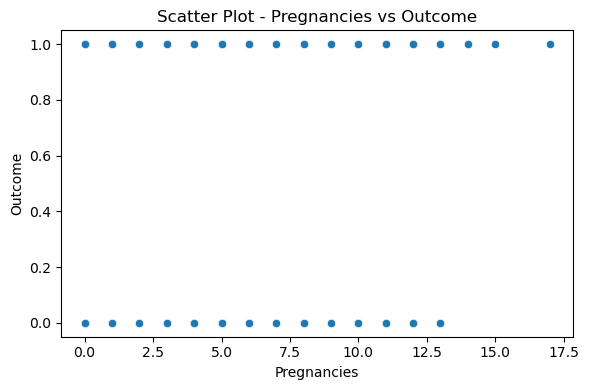

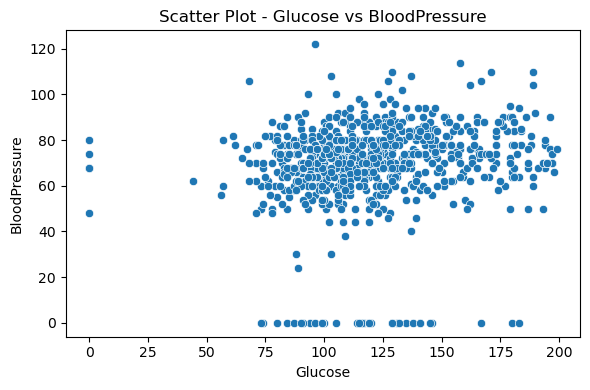

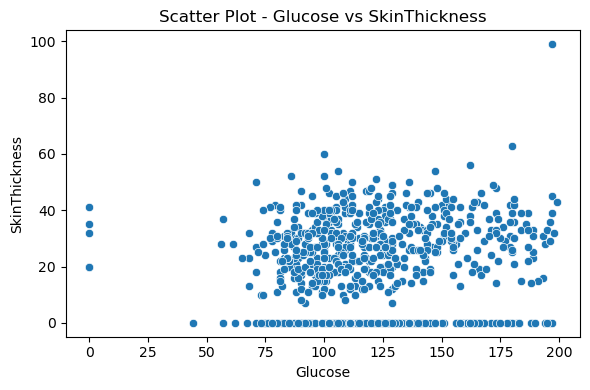

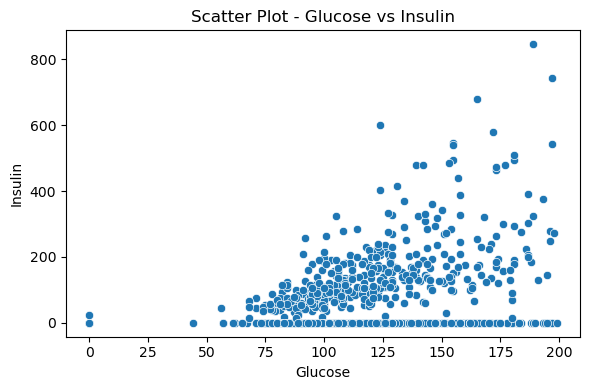

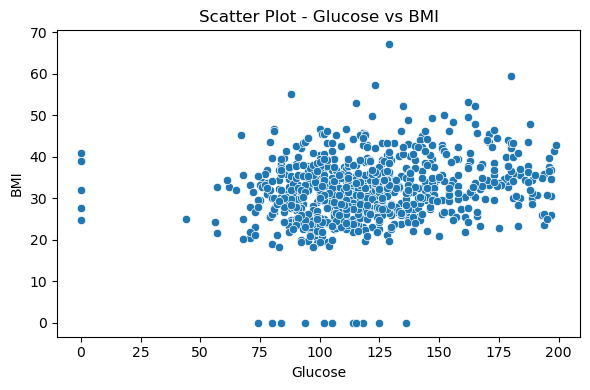

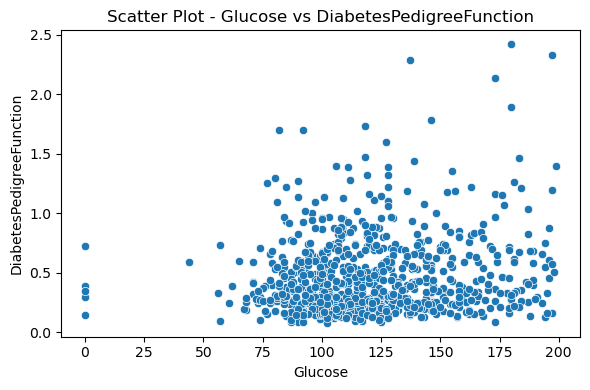

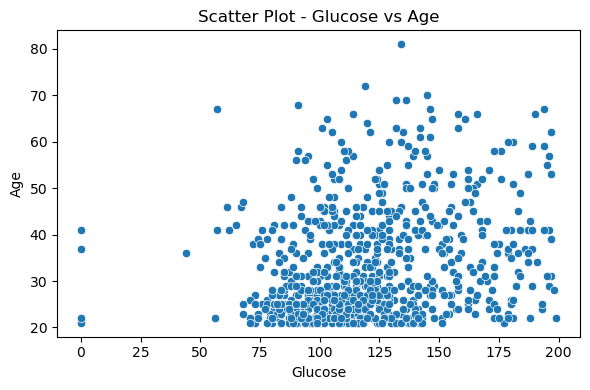

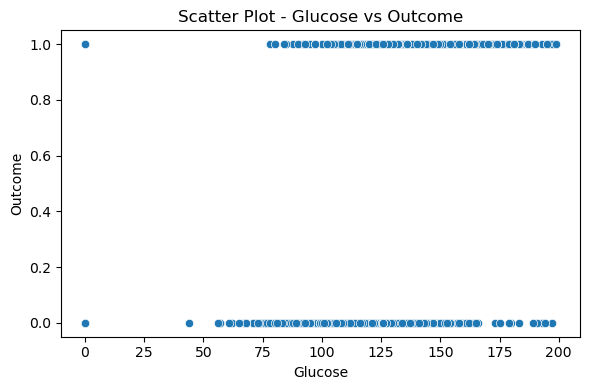

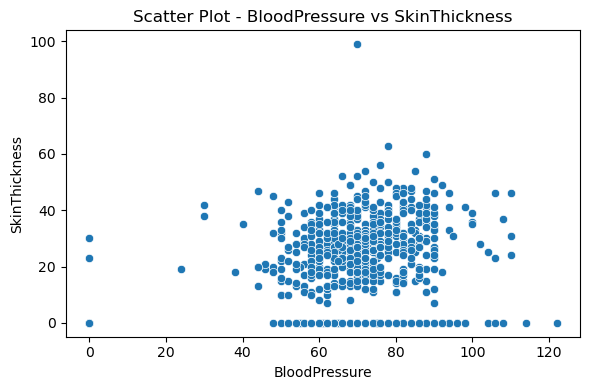

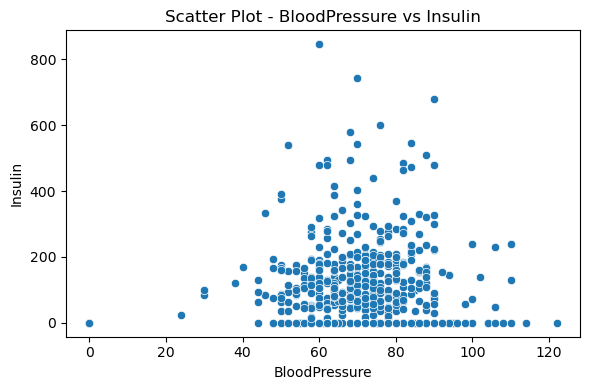

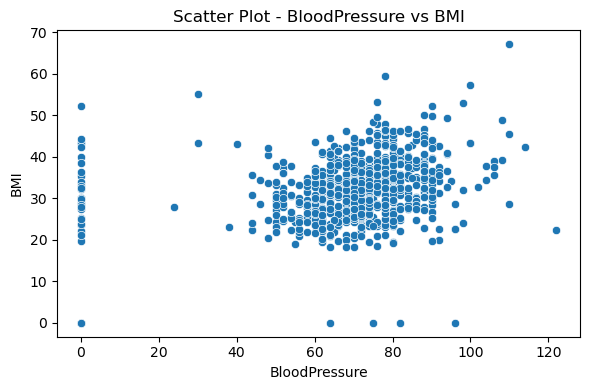

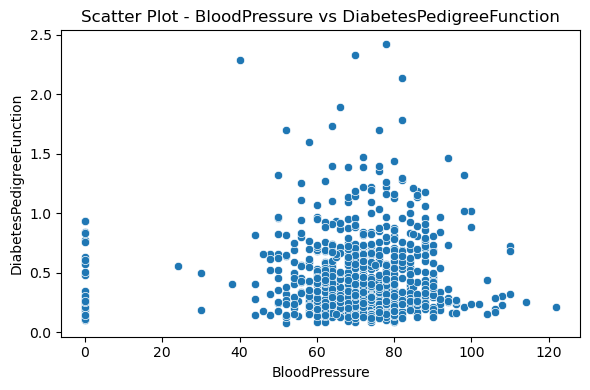

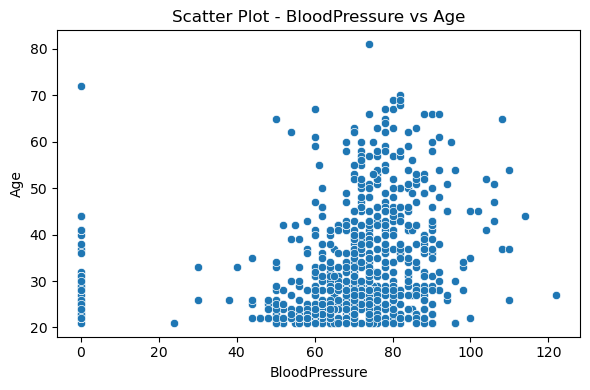

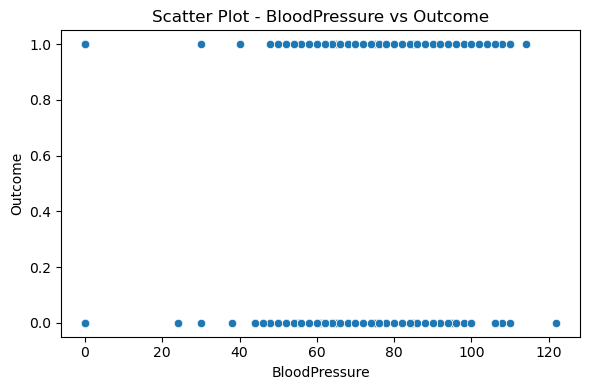

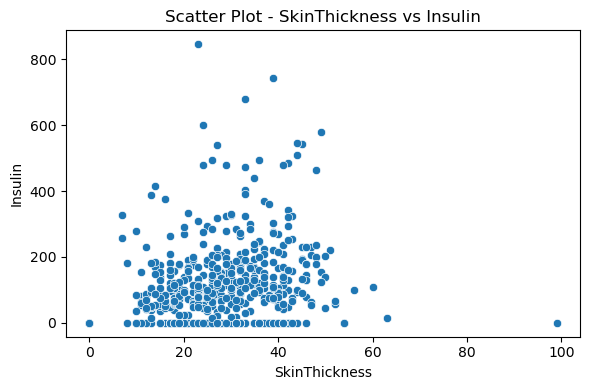

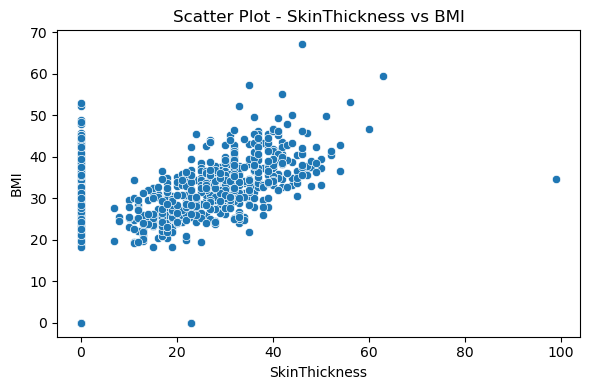

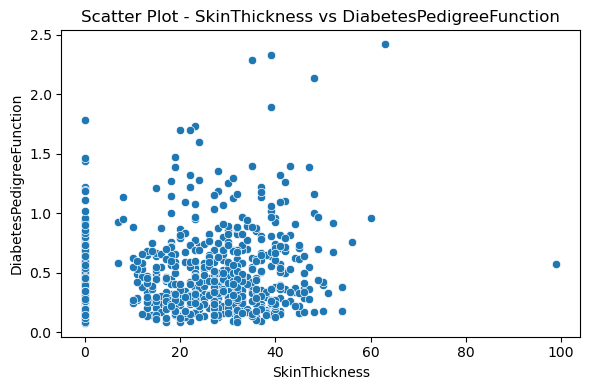

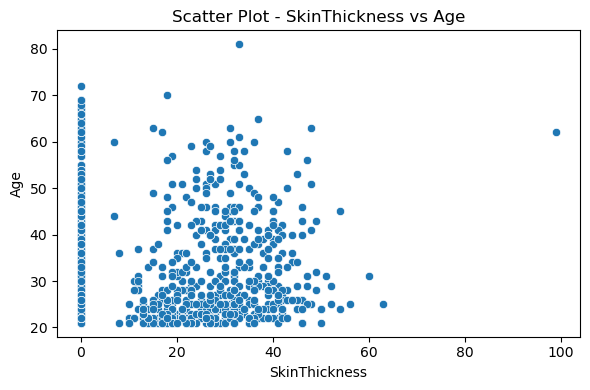

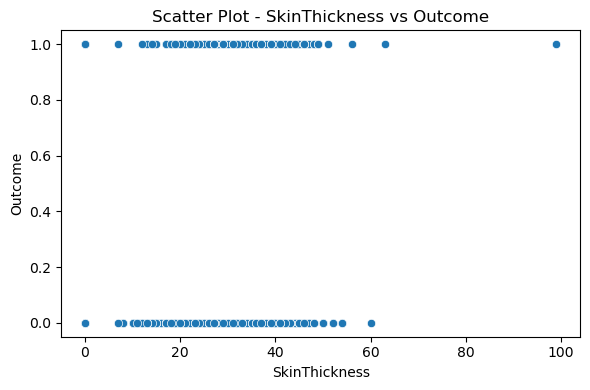

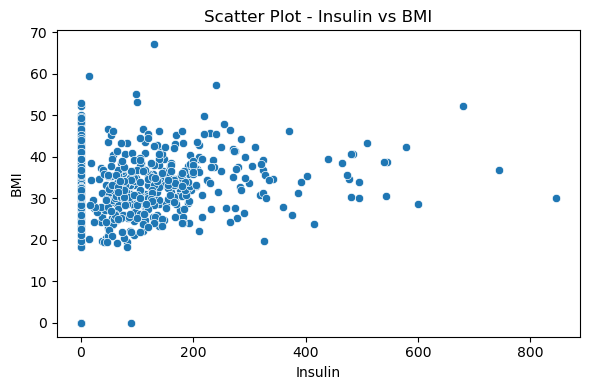

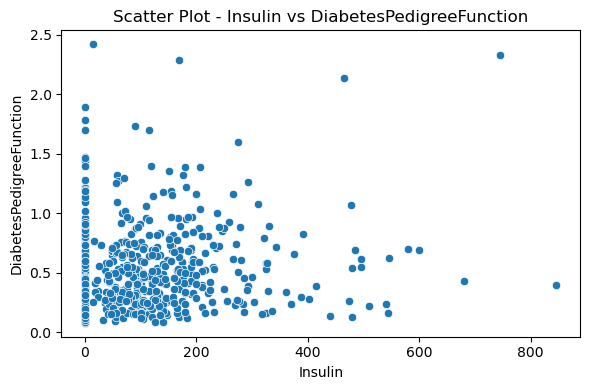

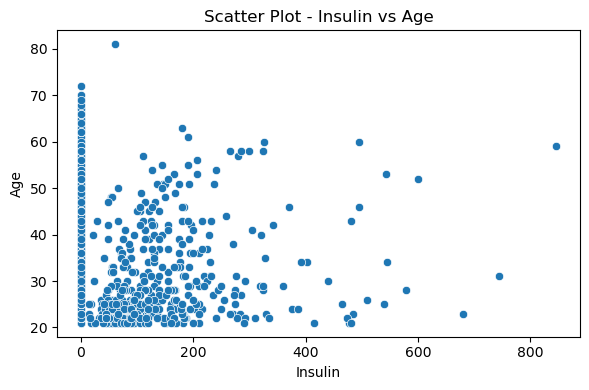

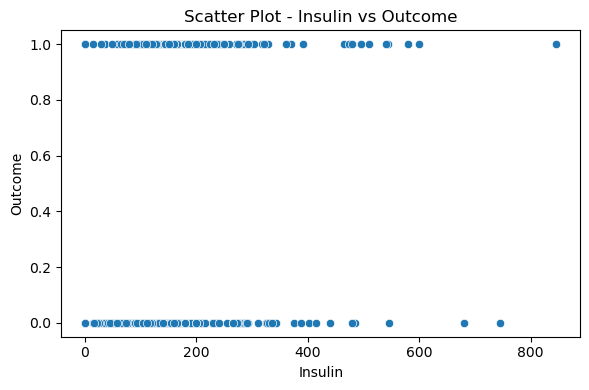

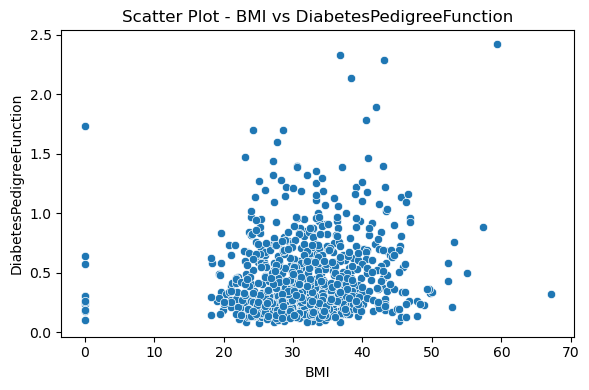

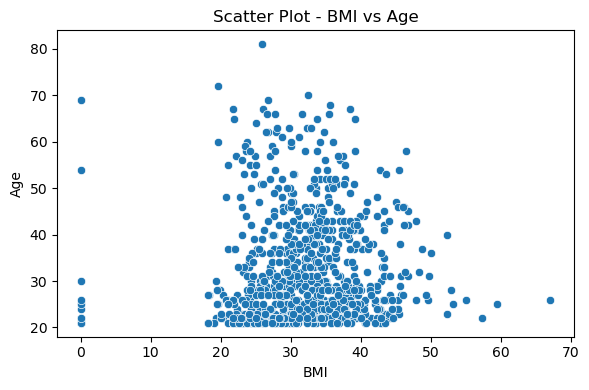

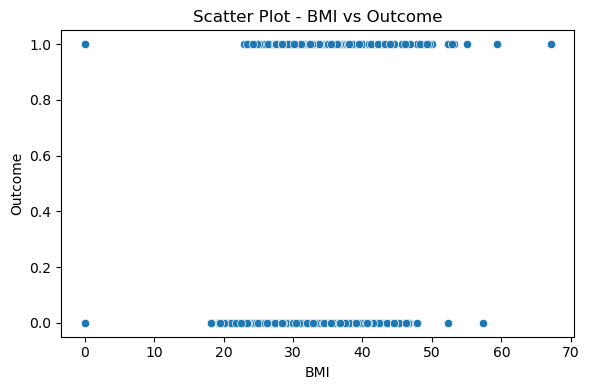

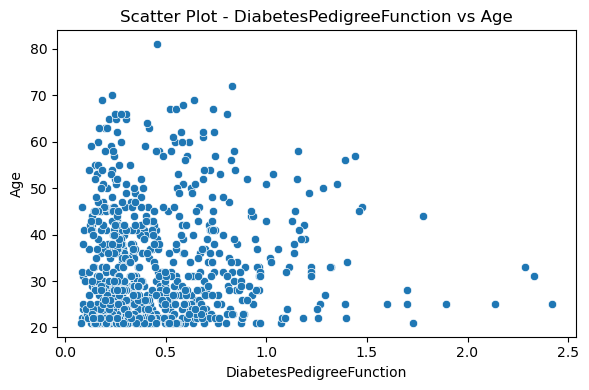

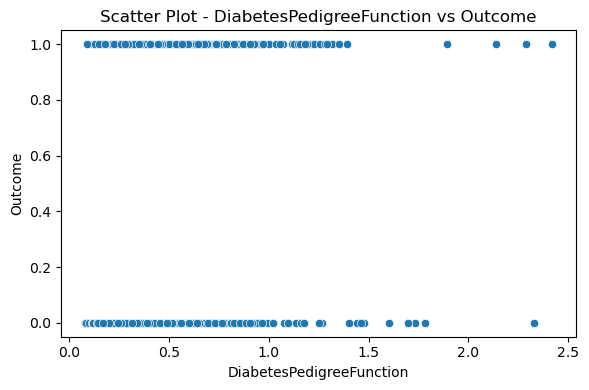

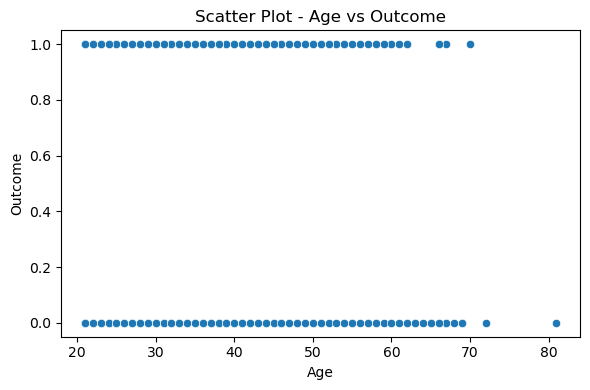

In [7]:
# --- 4. SCATTER PLOTS (numeric column pairs) ---
num_cols = df.select_dtypes(include='number').columns
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[num_cols[i]], y=df[num_cols[j]])
        plt.title(f'Scatter Plot - {num_cols[i]} vs {num_cols[j]}')
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.tight_layout()
        plt.show()

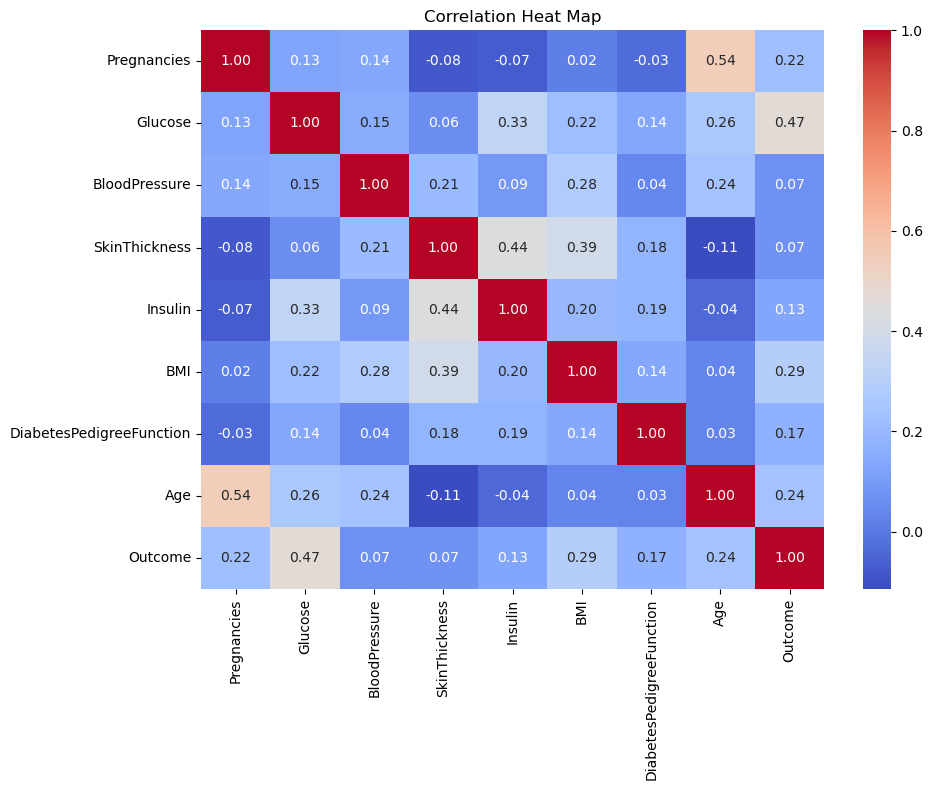

In [8]:
# --- 5. HEAT MAP (Correlation Matrix) ---
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map')
plt.tight_layout()
plt.show()

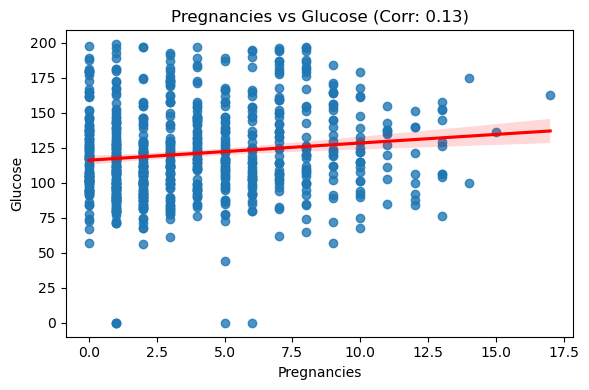

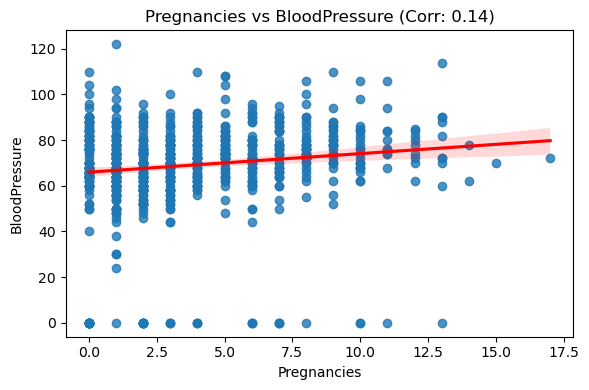

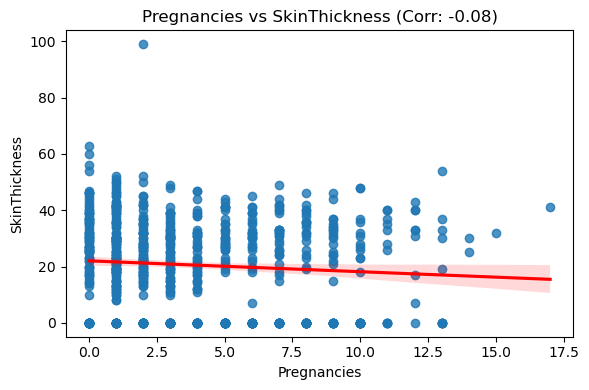

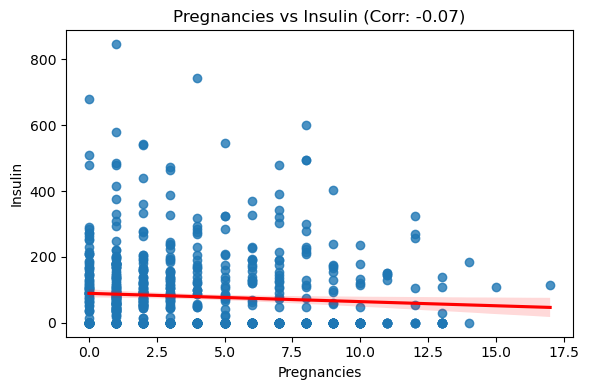

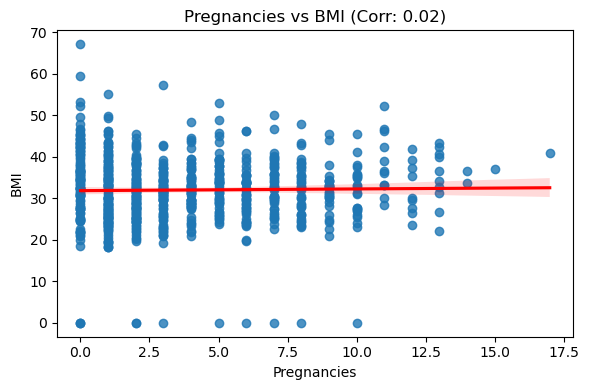

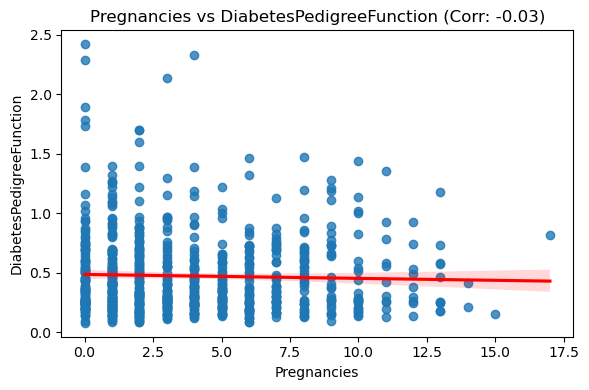

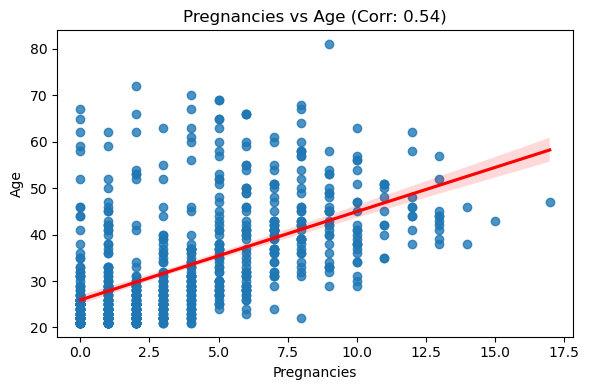

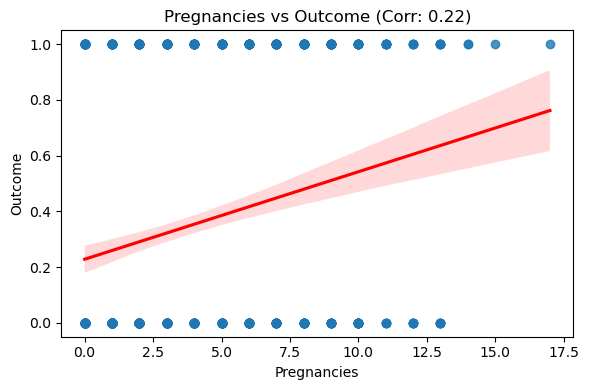

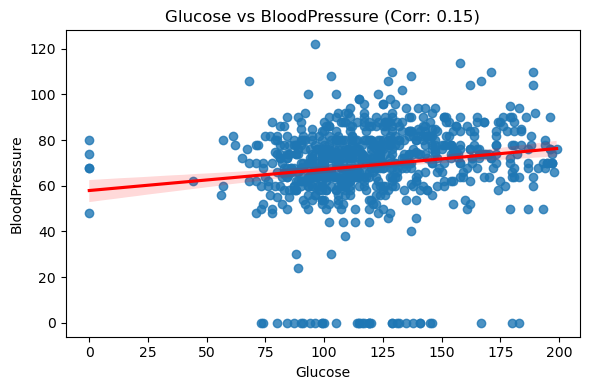

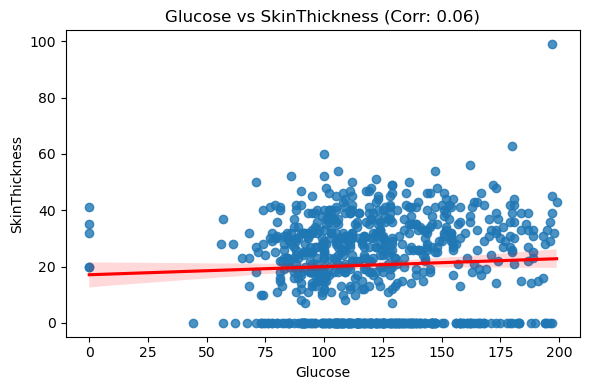

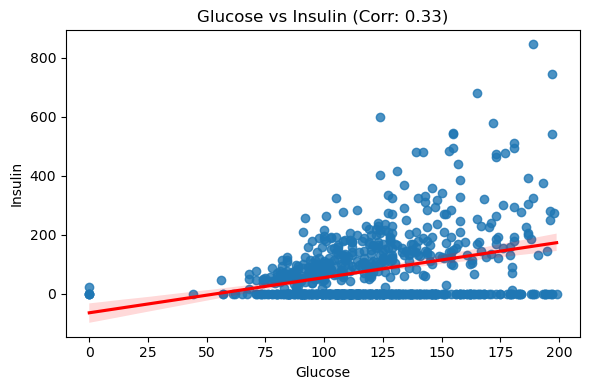

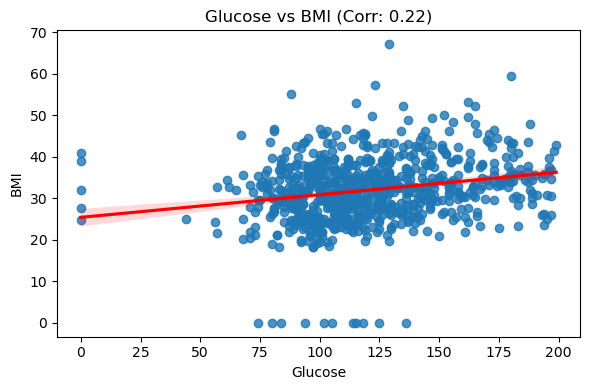

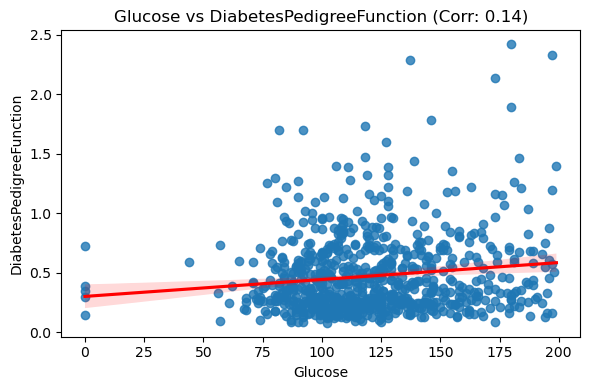

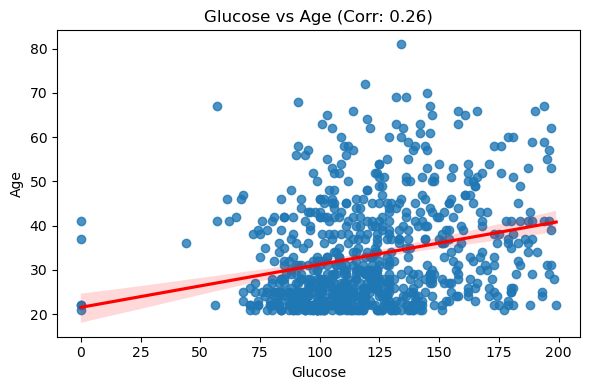

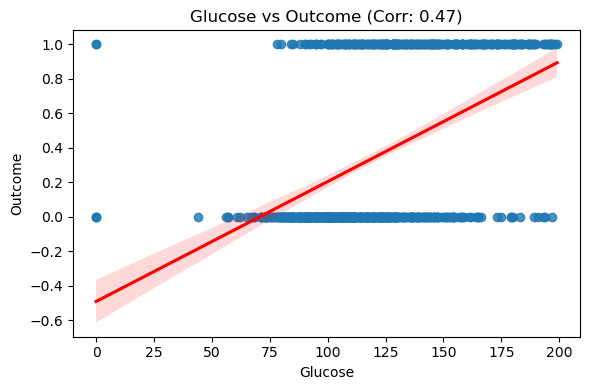

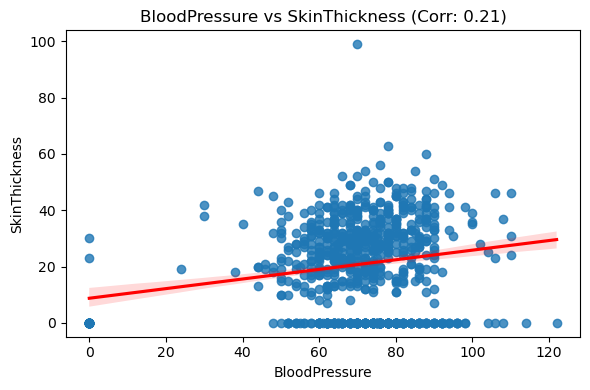

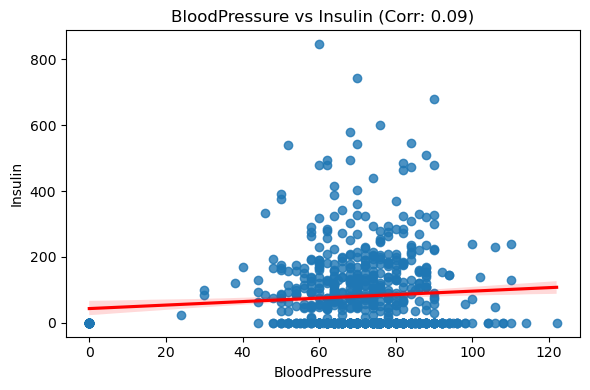

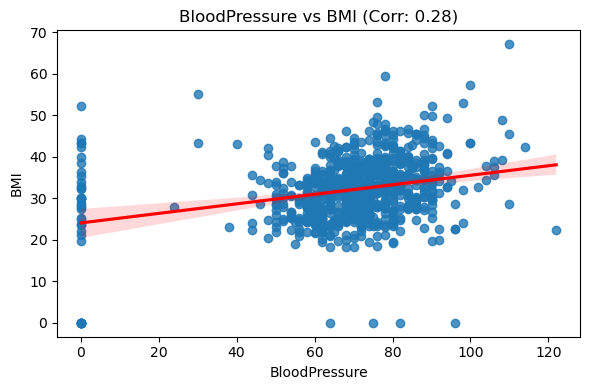

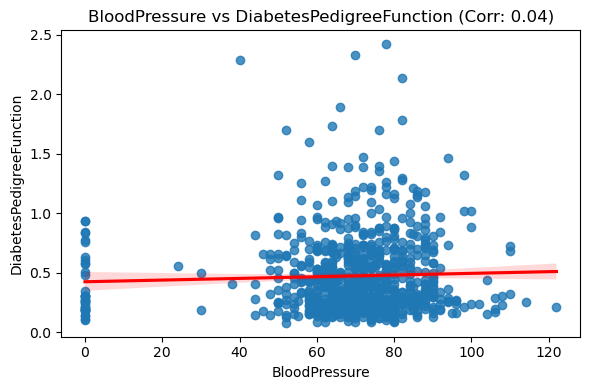

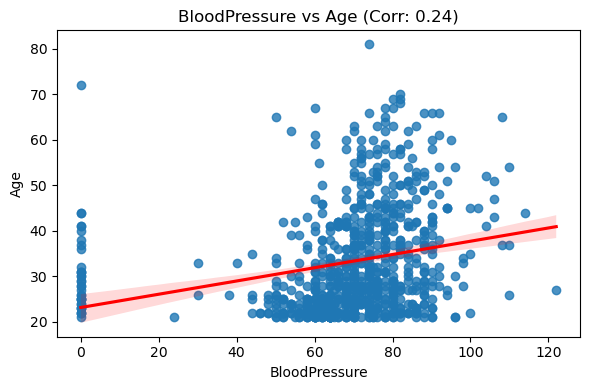

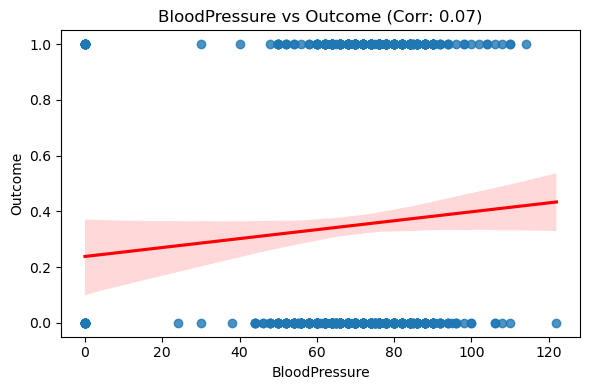

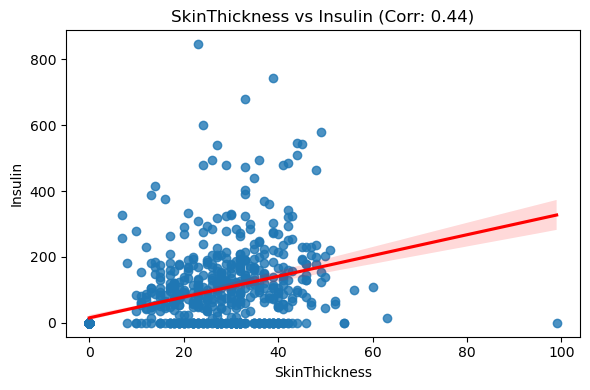

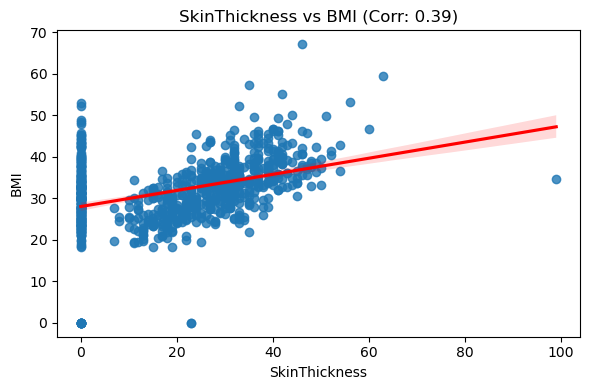

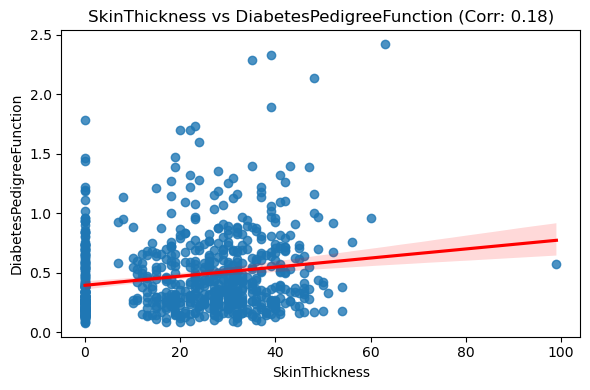

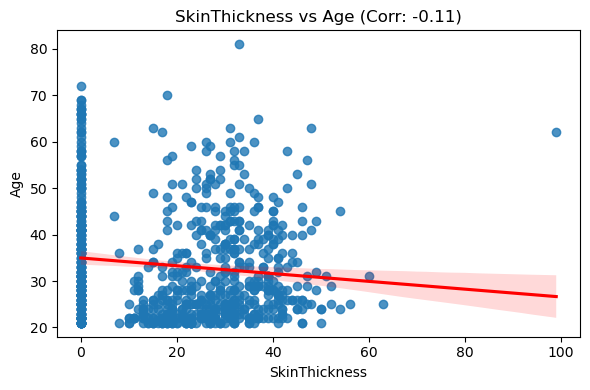

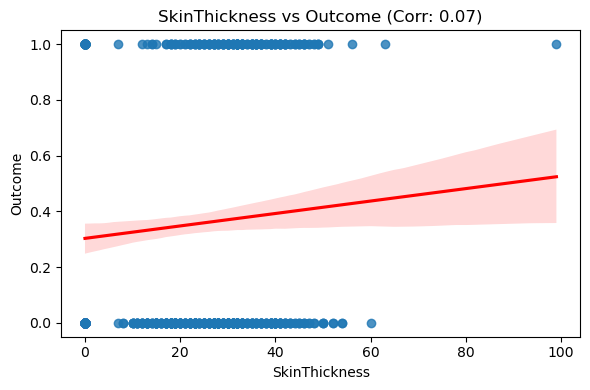

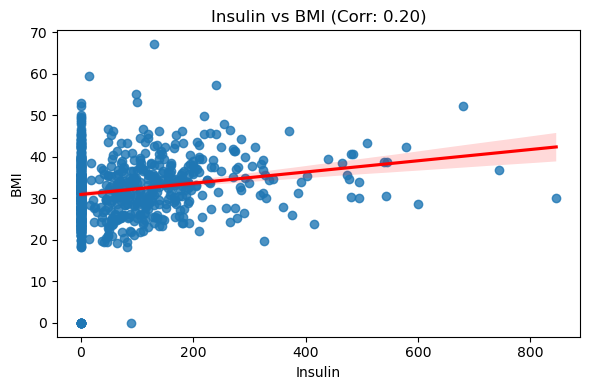

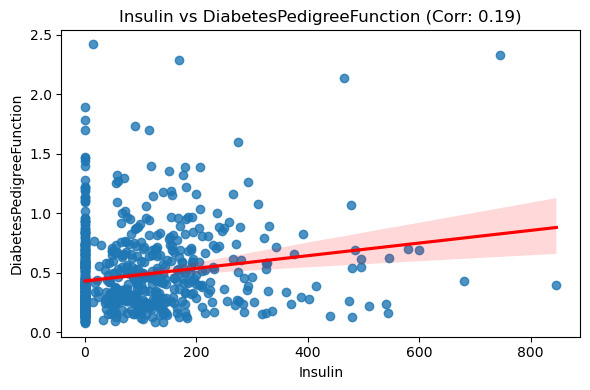

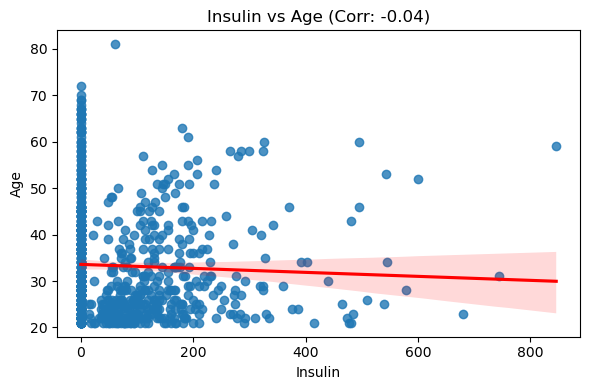

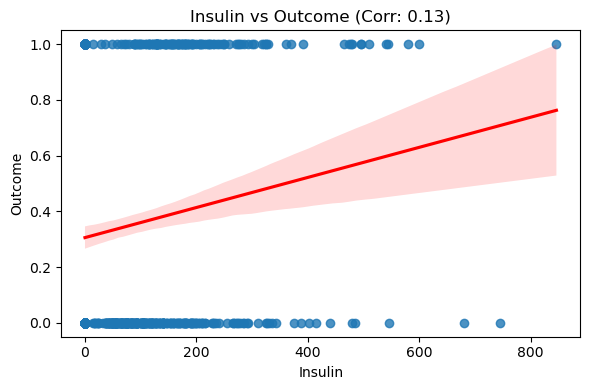

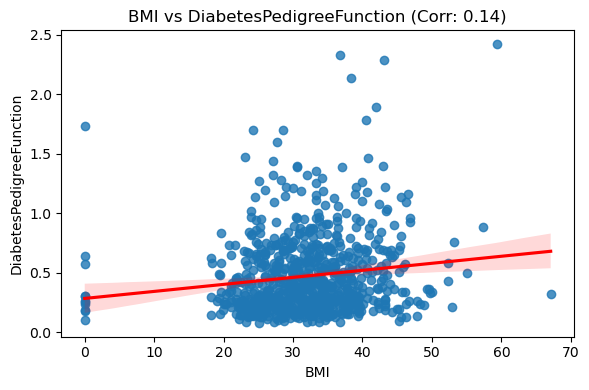

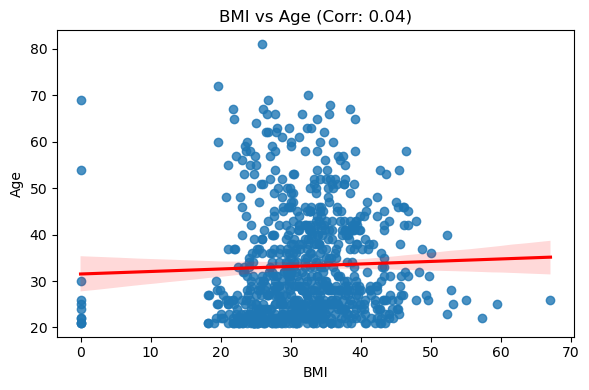

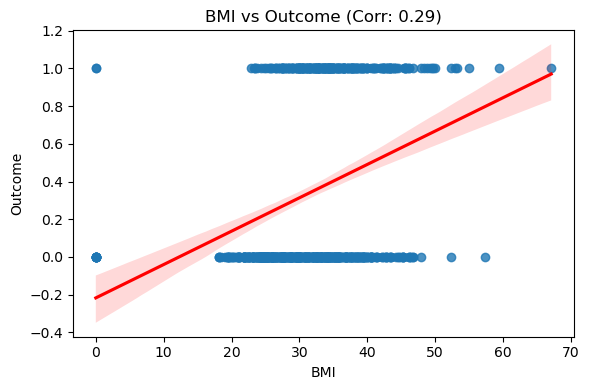

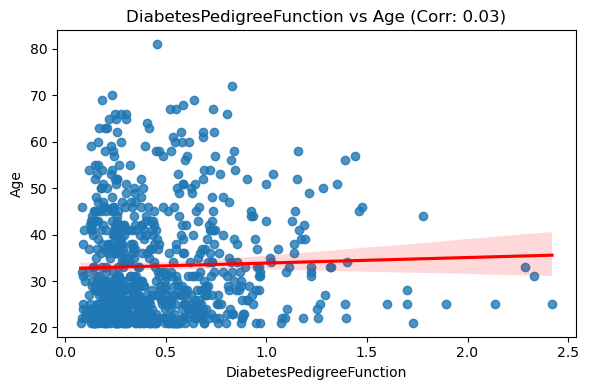

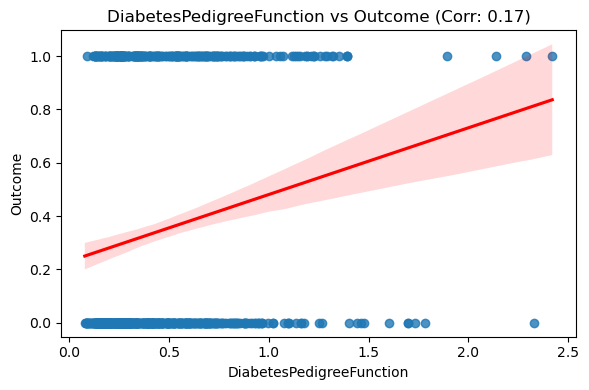

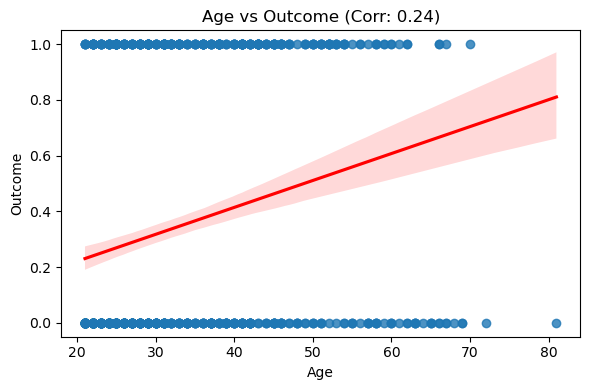

In [9]:
# --- 6. CORRELATION COEFFICIENT GRAPH (with regression line) ---
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        corr = df[num_cols[i]].corr(df[num_cols[j]])
        plt.figure(figsize=(6, 4))
        sns.regplot(x=df[num_cols[i]], y=df[num_cols[j]], line_kws={"color": "red"})
        plt.title(f'{num_cols[i]} vs {num_cols[j]} (Corr: {corr:.2f})')
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.tight_layout()
        plt.show()